**Import the relevant libraries**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

warnings.filterwarnings('ignore')

**Load the data**

In [19]:
raw_data = pd.read_csv(r'C:\Users\user\Downloads\cleaned_startup_data.xls')
raw_data

,company_id,category_code,country_code,state_code,total_rounds,average_participants,offices,ipo,is_acquired,is_closed,age_years,status,log_average_funded
0,c:10015,health,USA,California,5,3.8,1.0,0,0,0,6.26,0,16.426597
1,c:100228,education,USA,other,1,0.0,3.0,0,0,0,3.25,0,11.512925
2,c:100607,games_video,USA,California,1,1.0,1.0,0,0,0,3.00,0,10.596635
3,c:10075,web,USA,California,1,0.0,1.0,0,0,0,6.15,0,12.765688
4,c:100756,education,other,other,1,1.0,1.0,0,0,0,5.00,0,13.234838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,c:99669,enterprise,USA,other,1,6.0,1.0,0,0,0,3.00,0,13.527828
7506,c:9975,web,other,other,1,0.0,1.0,0,0,0,6.30,0,13.590714
7507,c:9977,mobile,USA,California,1,0.0,1.0,0,0,1,5.62,0,11.775290
7508,c:9995,public_relations,USA,California,1,0.0,1.0,0,0,0,6.17,0,13.527828


In [21]:
#drop offices and is_acquired 
columns_to_drop = ['offices', 'is_acquired']

In [23]:
data = raw_data.drop(columns=columns_to_drop)
data

,company_id,category_code,country_code,state_code,total_rounds,average_participants,ipo,is_closed,age_years,status,log_average_funded
0,c:10015,health,USA,California,5,3.8,0,0,6.26,0,16.426597
1,c:100228,education,USA,other,1,0.0,0,0,3.25,0,11.512925
2,c:100607,games_video,USA,California,1,1.0,0,0,3.00,0,10.596635
3,c:10075,web,USA,California,1,0.0,0,0,6.15,0,12.765688
4,c:100756,education,other,other,1,1.0,0,0,5.00,0,13.234838
...,...,...,...,...,...,...,...,...,...,...,...
7505,c:99669,enterprise,USA,other,1,6.0,0,0,3.00,0,13.527828
7506,c:9975,web,other,other,1,0.0,0,0,6.30,0,13.590714
7507,c:9977,mobile,USA,California,1,0.0,0,1,5.62,0,11.775290
7508,c:9995,public_relations,USA,California,1,0.0,0,0,6.17,0,13.527828


**Declare the features and target**

In [25]:
#declare the features and target
target = data['status']
features = data[['total_rounds', 'average_participants', 'ipo', 'is_closed', 'age_years', 'log_average_funded']]

**Split data into test and training**

In [35]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=42)

In [39]:
# Check if these exist
print(type(x_train))
print(type(y_train))
print(x_train.shape)
print(y_train.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(6008, 6)
(6008,)


**Create a SMOTE object**

In [41]:
smote = SMOTE(random_state=42)

In [45]:
# Apply SMOTE to the training features and labels
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

**Check the new class balance**

In [47]:
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_sm))

Before SMOTE: Counter({0: 5485, 1: 523})
After SMOTE: Counter({0: 5485, 1: 5485})


**Create the logistic regression**

In [51]:
logreg_sm = LogisticRegression(class_weight=None, random_state=42)
logreg_sm.fit(x_train_sm, y_train_sm)

LogisticRegression(random_state=42)

**Predict and evaluate on the original test set**

In [58]:
y_pred_sm = logreg_sm.predict(x_test)

**Confusion matrix**

In [64]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_sm)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[968 403]
 [ 37  94]]


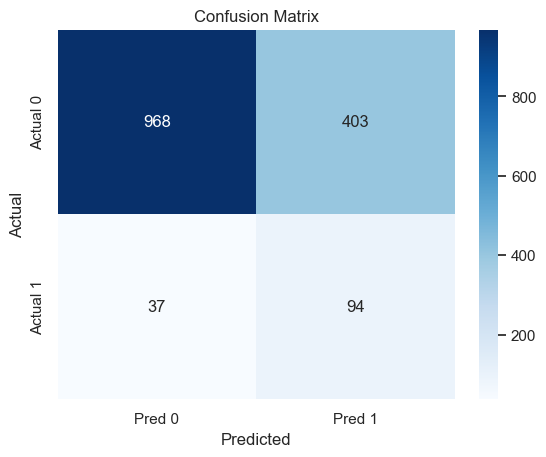

In [66]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Model accuracy in percentage**

In [73]:
cm1 = np.array(cm)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.7070572569906791

**Classification report**

In [75]:
# Generate the report as a dictionary
report_dict = classification_report(y_test, y_pred_sm, output_dict=True, target_names=['failure', 'success'])

# Convert to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Round for cleaner display
report_df = report_df.round(3)

# Show the table
report_df

,precision,recall,f1-score,support
failure,0.963,0.706,0.815,1371.000
success,0.189,0.718,0.299,131.000
accuracy,0.707,0.707,0.707,0.707
macro avg,0.576,0.712,0.557,1502.000
weighted avg,0.896,0.707,0.770,1502.000
